In [49]:
def get_result(file_path):
    results = []
    with open(file_path, 'r') as f:
        data = f.read()
        for line in data.split("\n")[:-1]:
            result = (int(line.split(" ")[0].split("_")[-1].split(".")[0]), int(line.split(" ")[-1]))
            results.append(result)
    return results

In [50]:
result_LS_30 = get_result("log/LS/results_30s.csv")
result_LS_60 = get_result("log/LS/results_60s.csv")
result_OR_30 = get_result("log/OR/results_30s.csv")
result_OR_60 = get_result("log/OR/results_60s.csv")

In [51]:
from matplotlib import pyplot as plt
def plot_results(result_1, result_2, title, label_1, label_2):
    plt.figure(figsize=(15, 10))
    plt.bar([x[0] for x in result_1], [x[1] for x in result_1], label=label_1, color="orange")
    plt.bar([x[0] for x in result_2], [x[1] for x in result_2], label=label_2, color="grey")
    for i in range(len(result_1)):
        if result_1[i][1] == result_2[i][1]:
            plt.bar(result_1[i][0], result_1[i][1], color="violet")
    # # the bar with a color violet is the one that has the same objective value for both algorithms
    # write it on the label
    plt.bar(0, 0, color="violet", label="Same objective value")
    plt.title(title)
    plt.xlabel("n°Instance")
    plt.ylabel("Objective value")
    plt.legend()
    plt.show()

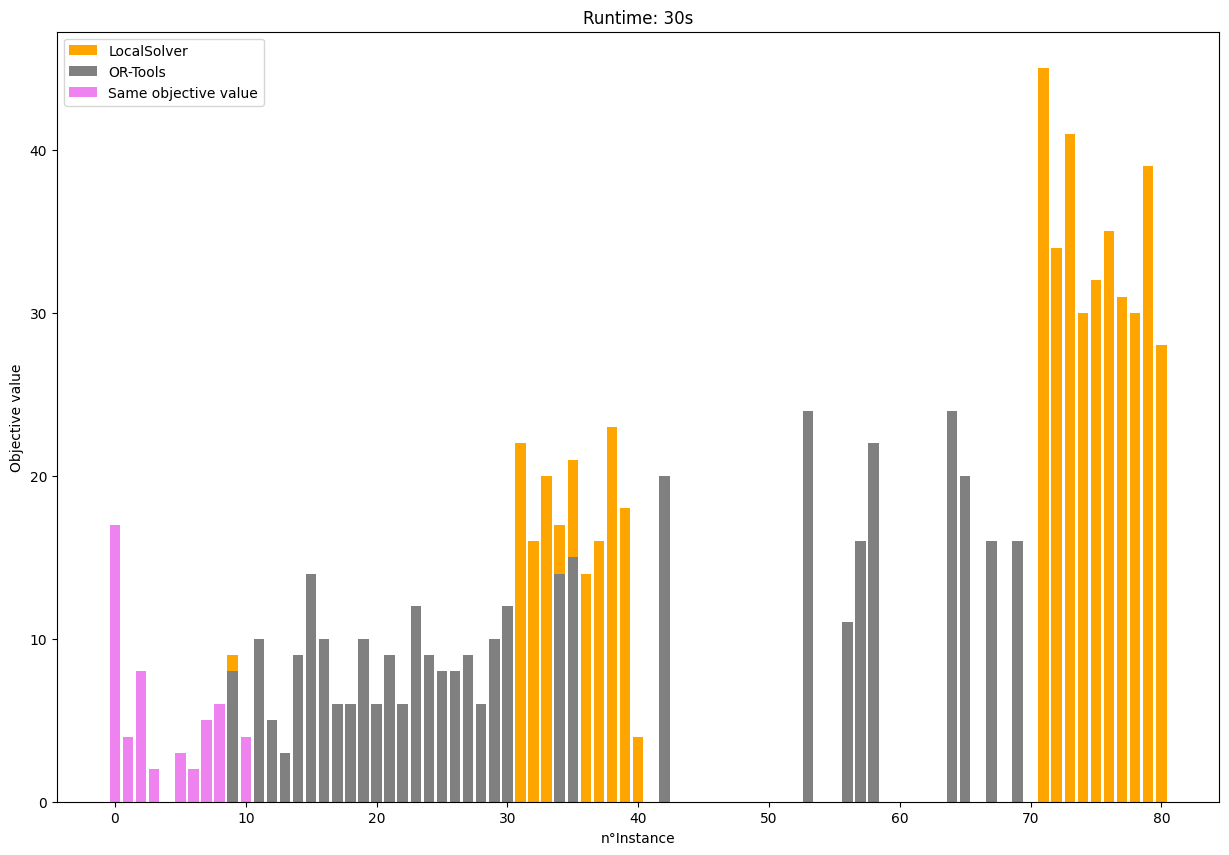

In [52]:
plot_results(result_LS_30, result_OR_30, "Runtime: 30s", "LocalSolver", "OR-Tools")

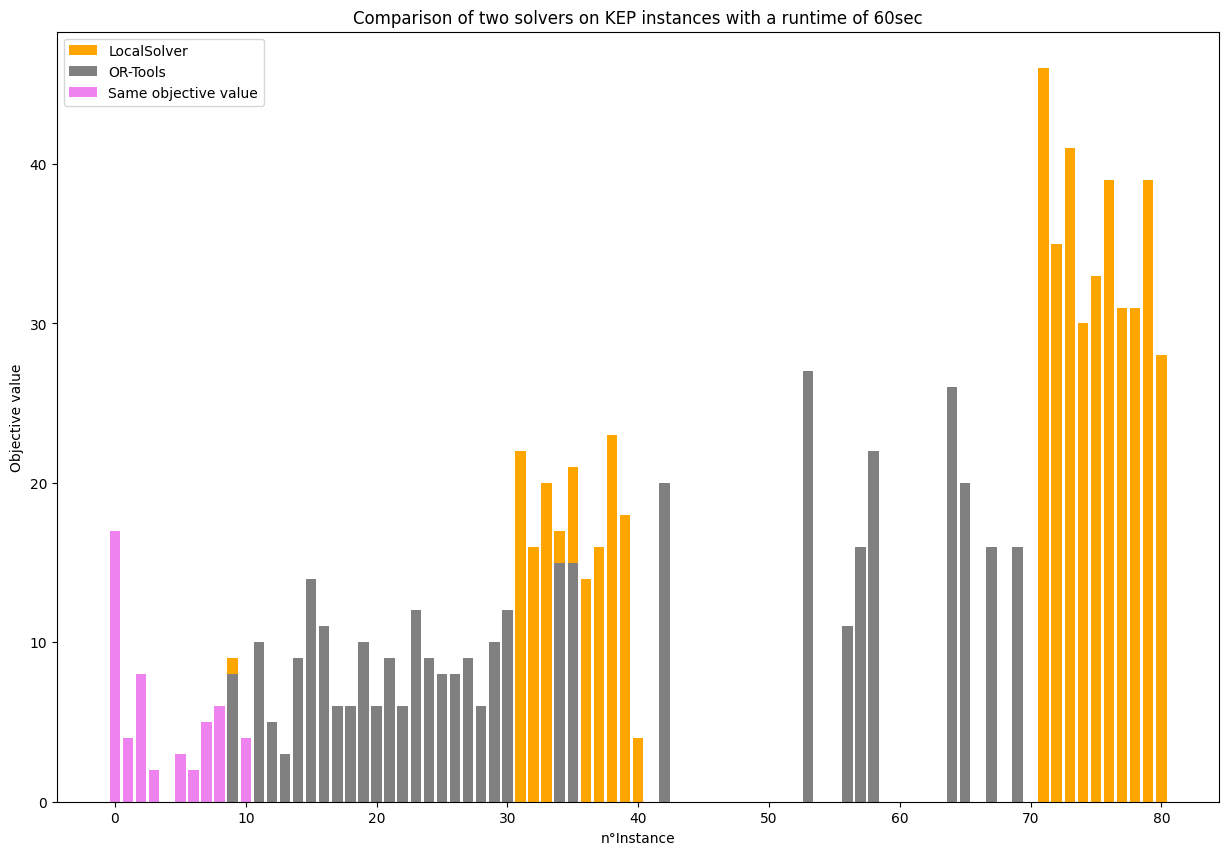

In [53]:
plot_results(result_LS_60, result_OR_60, "Comparison of two solvers on KEP instances with a runtime of 60sec", "LocalSolver", "OR-Tools")

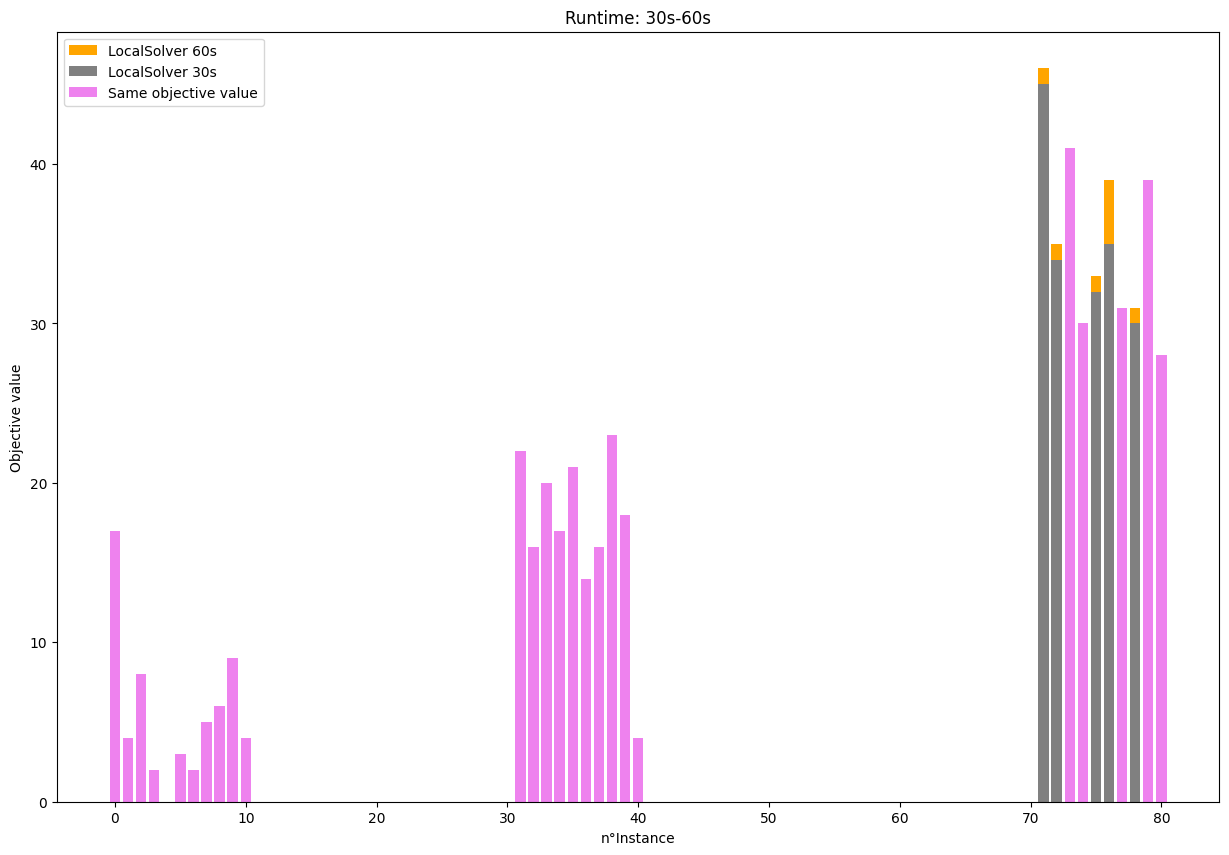

In [54]:
plot_results(result_LS_60, result_LS_30, "Runtime: 30s-60s", "LocalSolver 60s", "LocalSolver 30s")

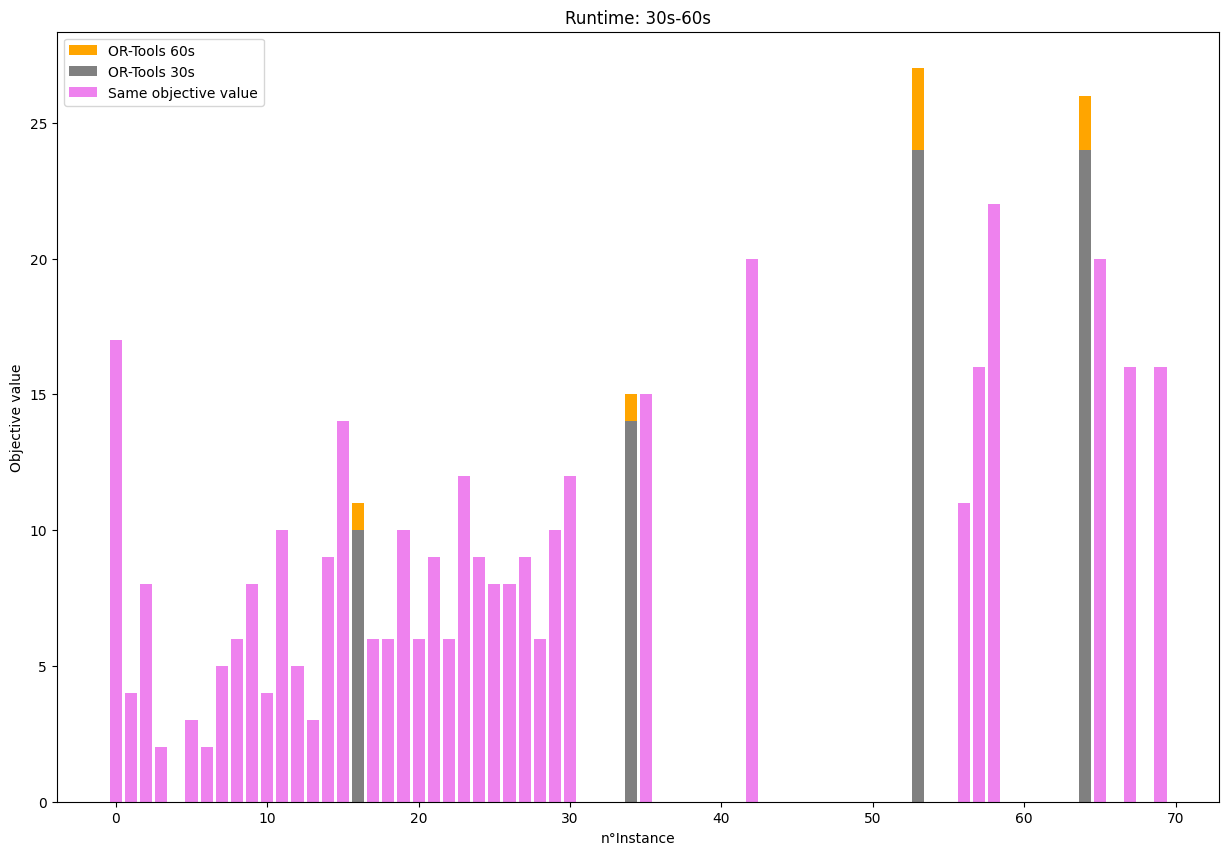

In [55]:
plot_results(result_OR_60, result_OR_30, "Runtime: 30s-60s", "OR-Tools 60s", "OR-Tools 30s")

In [56]:
# compare results
def compare_results(result_1, result_2):
    count = 0
    for i in range(len(result_1)):
        # count the number of instances where the objective value of the first algorithm is better than the second
        # here better means greater
        if result_1[i][1] > result_2[i][1]:
            count += 1
    return count

In [60]:
compare_results(result_LS_60, result_OR_60)

20

In [61]:
len(result_LS_60)

31

In [62]:
len(result_OR_60)

42